# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [67]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to C:\Users\Aaron
[nltk_data]     Simpson\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [18]:
# Read your api key environment variable
api_key = os.getenv("NEWS_API_KEY")
NEWS_API_KEY = '6af7e098fb124c52941e9ae60cee5764'

In [19]:
# Create a newsapi client
newsapi = NewsApiClient(api_key="6af7e098fb124c52941e9ae60cee5764")

In [20]:
# Fetch the Bitcoin news articles
bitcoin_news_en = newsapi.get_everything(q="bitcoin", 
                                         language="en", 
                                         sort_by="relevancy")

bitcoin_news_en["totalResults"]

7761

In [21]:
# Fetch the Ethereum news articles
ethereum_news_en = newsapi.get_everything(q="ethereum", 
                                         language="en", 
                                         sort_by="relevancy")

ethereum_news_en["totalResults"]

3851

In [38]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiment = []

for article in bitcoin_news_en["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiment.append({
            "Text": text,
            "Date": date,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu
            
        })
        
    except AttributeError:
        pass

    # Sentiment of text and Title

bitcoin_df = pd.DataFrame(bitcoin_sentiment)
bitcoin_df.set_index("Date", inplace=True)

In [43]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiment = []

for article in ethereum_news_en["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiment.append({
            "Text": text,
            "Date": date,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu
            
        })
        
    except AttributeError:
        pass

# Sentiment of text and Title
ethereum_df = pd.DataFrame(ethereum_sentiment)
ethereum_df.set_index("Date", inplace=True)

In [44]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.142255,0.077450,0.044300,0.878350
std,0.412751,0.049525,0.062683,0.071554
min,-0.771300,0.000000,0.000000,0.730000
25%,-0.118550,0.053250,0.000000,0.843750
50%,0.318200,0.085000,0.000000,0.870500
75%,0.458800,0.107000,0.061750,0.922250
max,0.636900,0.171000,0.187000,1.000000


In [45]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.184895,0.076450,0.024600,0.898900
std,0.424222,0.096231,0.037614,0.109702
min,-0.526700,0.000000,0.000000,0.682000
25%,0.000000,0.000000,0.000000,0.841000
50%,0.000000,0.023500,0.000000,0.919500
75%,0.528675,0.141500,0.048500,1.000000
max,0.867600,0.270000,0.115000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [46]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [68]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
 sw = set(stopwords.words)

# Expand the default stopwords list if necessary
print(stopwords.words('english'))

IndentationError: unexpected indent (Temp/ipykernel_8880/2669114010.py, line 5)

In [49]:
# Complete the tokenizer function
def tokenizer(text):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    lemmatizer = WordNetLemmatizer()
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    return tokens

print(tokenizer(str(bitcoin_df["Text"])))

['date', 'mr', 'spiekers', 'prominent', 'customer', 'fund', 'vehicle', 'hold', 'crypto', 'directly', 'russia', 'invaded', 'ukraine', 'niki', 'proshin', 'wa', 'san', 'salvador', 'march', 'reuters', 'el', 'salvador', 'bitcoin', 'wa', 'seen', 'many', 'libertarianl', 'march', 'reuters', 'bitcoin', 'isnt', 'anonym', 'march', 'reuters', 'bitcoin', 'ha', 'leapt', 'since', 'ru', 'whose', 'side', 'cryptocurrency', 'gettyrnwelcome', 'nonfungible', 'tidbits', 'f', 'heres', 'happened', 'week', 'crypto', 'w', 'nurphotogettyrnas', 'russia', 'launched', 'invasi', 'london', 'march', 'reuters', 'cryptocurrencies', 'h', 'san', 'salvador', 'march', 'reuters', 'el', 'salvador', 'march', 'reuters', 'bitcoin', 'love', 'flirting', 'wi', 'kennerdell', 'pa', 'march', 'reuters', 'vast', 'london', 'march', 'reuters', 'bitcoin', 'climbed', 'feb', 'welcome', 'home', 'realtime', 'cov', 'san', 'salvador', 'march', 'reuters', 'el', 'salvador', 'ullirnsummarylilirnlaw', 'firmsli', 'ukrainian', 'government', 'asking', 

In [50]:
# Create a new tokens column for Bitcoin
bitcoin_df["Tokens"] = bitcoin_df["Text"].apply(tokenizer)
bitcoin_df["Tokens"].head()

Date
2022-03-24    [mr, spiekers, prominent, customer, described,...
2022-03-24    [fund, vehicle, hold, crypto, directly, theyre...
2022-03-17    [russia, invaded, ukraine, niki, proshin, wa, ...
2022-03-23    [san, salvador, march, reuters, el, salvador, ...
2022-03-12    [bitcoin, wa, seen, many, libertarianleaning, ...
Name: Tokens, dtype: object

In [51]:
# Create a new tokens column for Ethereum
ethereum_df["Tokens"] = ethereum_df["Text"].apply(tokenizer)
ethereum_df.tail()

,Text,Compound,Positive,Negative,Neutral,Tokens
Date,,,,,,
2022-03-24,"JERUSALEM, March 24 (Reuters) - Bank Leumi (LU...",0.0000,0.000,0.000,1.000,"[jerusalem, march, reuters, bank, leumi, lumit..."
2022-03-07,If blockchain technology is to reach true mass...,0.7722,0.249,0.059,0.692,"[blockchain, technology, reach, true, mass, ad..."
2022-03-17,The news: Blockchain specialist ConsenSys scoo...,0.4019,0.078,0.000,0.922,"[newsblockchain, specialistconsensysscooped, m..."
2022-03-01,(Kitco News) The escalating Russia-Ukraine cri...,-0.5267,0.047,0.115,0.838,"[kitco, news, escalating, russiaukraine, crisi..."
2022-03-04,Personal Finance Insider writes about products...,0.5346,0.158,0.000,0.842,"[personal, finance, insider, writes, product, ..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [52]:
from collections import Counter
from nltk import ngrams

In [53]:
# Generate the Bitcoin N-grams where N=2
btc_top10 = ngrams(tokenizer(str(bitcoin_df["Text"])),2)

In [54]:
# Generate the Ethereum N-grams where N=2
eth_top10 = ngrams(tokenizer(str(ethereum_df["Text"])),2)

In [55]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [56]:
# Use token_count to get the top 10 words for Bitcoin
Counter(btc_top10).most_common(10)

[(('march', 'reuters'), 9),
 (('salvador', 'march'), 4),
 (('reuters', 'bitcoin'), 4),
 (('san', 'salvador'), 3),
 (('reuters', 'el'), 3),
 (('el', 'salvador'), 3),
 (('london', 'march'), 2),
 (('date', 'mr'), 1),
 (('mr', 'spiekers'), 1),
 (('spiekers', 'prominent'), 1)]

In [57]:
# Use token_count to get the top 10 words for Ethereum
Counter(eth_top10).most_common(10)

[(('cryptocurrency', 'boom'), 4),
 (('boom', 'past'), 4),
 (('past', 'year'), 4),
 (('version', 'article'), 2),
 (('article', 'wa'), 2),
 (('wa', 'published'), 2),
 (('published', 'tim'), 2),
 (('tim', 'cryptocurrency'), 2),
 (('march', 'reuters'), 2),
 (('date', 'february'), 1)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [70]:
%pip install WordCloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

Note: you may need to restart the kernel to use updated packages.


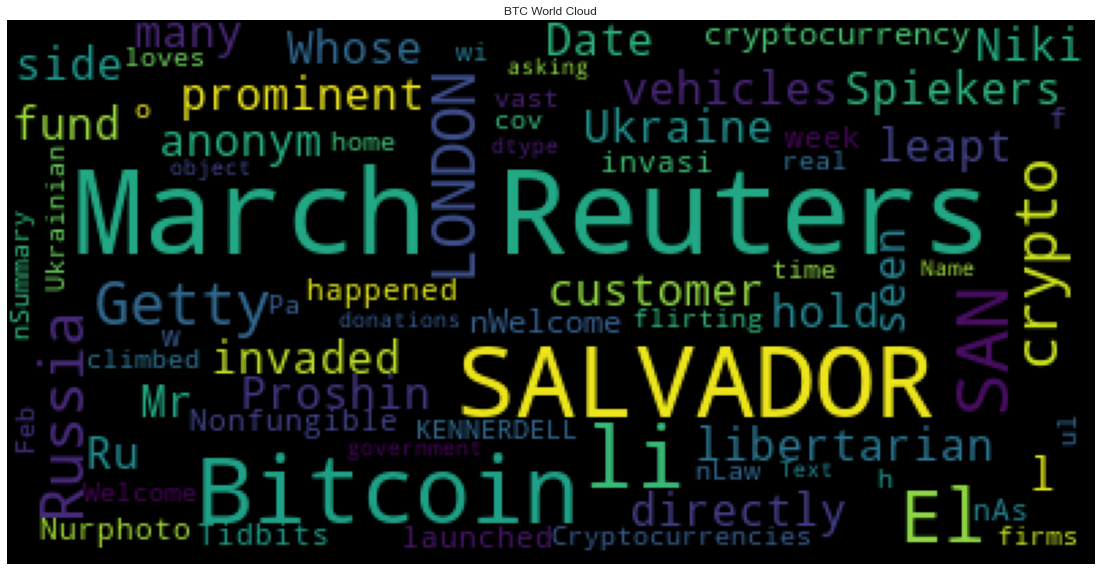

In [71]:
# Generate the Bitcoin word cloud
def wordcloud(text, title):
    wc = WordCloud().generate(text)
    plt.axis("off")
    plt.title(title)
    plt.imshow(wc)

wordcloud(str(bitcoin_df["Text"]),"BTC World Cloud")

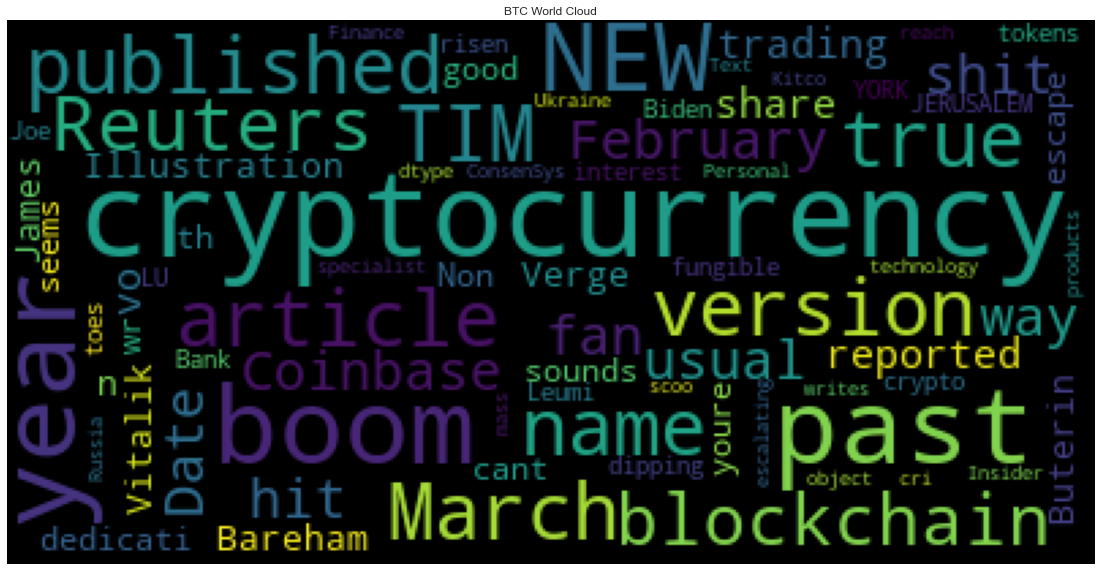

In [72]:
# Generate the Ethereum word cloud
def wordcloud(text, title):
    wc = WordCloud().generate(text)
    plt.axis("off")
    plt.title(title)
    plt.imshow(wc)

wordcloud(str(ethereum_df["Text"]),"BTC World Cloud")

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [73]:
%pip install spacy
import spacy
from spacy import displacy

  Using cached langcodes-3.3.0-py3-none-any.whl (181 kB)
  Using cached wasabi-0.9.0-py3-none-any.whl (25 kB)
  Using cached typer-0.4.0-py3-none-any.whl (27 kB)
  Using cached spacy_loggers-1.0.1-py3-none-any.whl (7.0 kB)
  Using cached spacy_legacy-3.0.9-py2.py3-none-any.whl (20 kB)
  Using cached pathy-0.6.1-py3-none-any.whl (42 kB)
  Using cached smart_open-5.2.1-py3-none-any.whl (58 kB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

In [ ]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [ ]:
# Concatenate all of the Bitcoin text together
btc_concat = " ".join(bitcoin_df.Text.to_list())
print(btc_concat)

In [ ]:
# Run the NER processor on all of the text
btc_ner = nlp(btc_concat)

# Add a title to the document
btc_ner.user_data["title"] = "Bitcoin NER"!

In [ ]:
# Render the visualization
displacy.render(btc_ner, style='ent')

In [ ]:
# List all Entities
for ent in btc_ner.ents:
    print(ent.text, ent.label_)

---

### Ethereum NER

In [ ]:
# Concatenate all of the Ethereum text together
eth_concat = " ".join(ethereum_df.Text.to_list())
print(eth_concat)

In [ ]:
# Run the NER processor on all of the text
eth_ner = nlp(eth_concat)

# Add a title to the document
eth_ner.user_data["title"] = "Ethereum NER"

In [ ]:
# Render the visualization
displacy.render(eth_ner, style='ent')

In [ ]:
# List all Entities
for ent in eth_ner.ents:
    print(ent.text, ent.label_)

---